In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv('score_updated.csv')  # Or use 'score_updated.csv' if preferred

# Display the first few rows of the dataset
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
# Step 1: Preprocessing
# Check for missing values
data.isnull().sum()

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data[['Hours']]  # Feature (study hours)
y = data['Scores']   # Target (scores)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 17.007444250866516
R-squared: 0.9708871356050831


In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
data = pd.read_csv('score_updated.csv')

# Split the data into features (X) and target (y)
X = data[['Hours']].values  # Feature
y = data['Scores'].values  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 17.203039692152913
R-squared: 0.9705523208337135


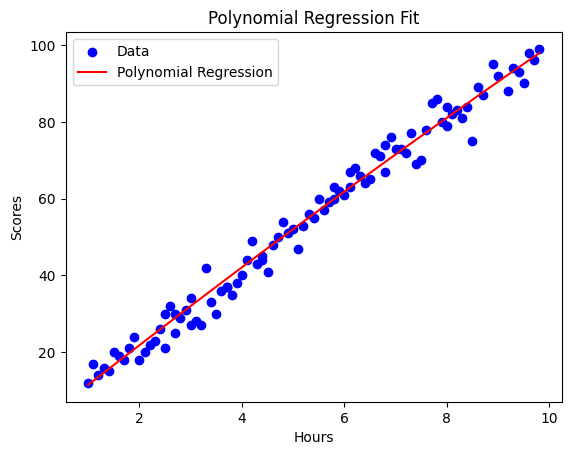

In [54]:
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X, y, color='blue', label='Data')

# Plot the polynomial regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range = model.predict(X_range_poly)
plt.plot(X_range, y_range, color='red', label='Polynomial Regression')

plt.title('Polynomial Regression Fit')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


In [55]:
import joblib

# Save the trained polynomial features transformer and the Ridge model
joblib.dump(poly, 'polynomial_transformer.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')


['ridge_model.pkl']